In [33]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt


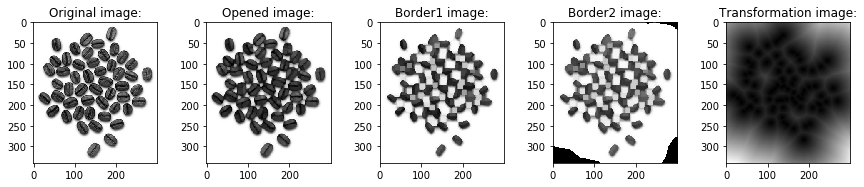

In [34]:
img = cv.imread('coffee_grains.jpg', 0)

# Scale of colors
imageGray = cv.cvtColor(img, cv.COLOR_GRAY2BGR)

# Binary threshold
ret, imageThresh = cv.threshold(imageGray, 0, 255, cv.THRESH_BINARY_INV, +cv.THRESH_OTSU)   
    
# noise removal
kernel = np.ones((3,3), np.uint8) 
imgOpened = cv.morphologyEx(img, cv.MORPH_OPEN, kernel, iterations = 2)

# sure background area
sure_bg = cv.dilate(imgOpened, kernel, iterations = 3)

# Finding sure foreground area
dist_transform = cv.distanceTransform(imgOpened,cv.DIST_L2,5)
ret, sure_fg = cv.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)

# Marker labelling
ret, markers = cv.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==0] = 255


# Output image resizing
plt.figure(figsize=(15,15))

# Alignment, ordering and display of the output images
plt.subplot(5,5,1)
plt.title("Original image:")
plt.imshow(img, cmap = 'gray')

plt.subplot(5,5,2)
plt.title("Opened image:")
plt.imshow(imgOpened, cmap = 'gray')

plt.subplot(5,5,3)
plt.title("Border1 image:")
plt.imshow(sure_bg, cmap = 'gray')

plt.subplot(5,5,4)
plt.title("Border2 image:")
plt.imshow(unknown, cmap = 'gray')

plt.subplot(5,5,5)
plt.title("Transformation image:")
plt.imshow(dist_transform, cmap = 'gray')

